In [41]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv("ETHUSD.csv",index_col=[0],parse_dates=[0])

In [43]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479


In [44]:
projection = 10

In [45]:
df['Prediction'] = df['Close'].shift(-projection)

In [46]:
df.tail(15)

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2023-06-04,1892.398193,1912.205688,1885.651855,1890.513550,3747042696,1650.519287
2023-06-05,1890.417603,1890.640503,1780.211548,1811.828369,9246593033,1665.519775
2023-06-06,1810.581421,1896.222656,1801.405273,1884.494873,8704411776,1716.668823
2023-06-07,1884.372925,1893.809082,1822.303101,1832.395996,7919894455,1727.204102
2023-06-08,1832.513550,1861.136108,1830.165039,1846.301880,4536041931,1720.577515
2023-06-09,1846.077881,1854.824951,1828.544556,1840.225220,4610831509,NaN
2023-06-10,1840.391968,1844.785645,1721.443115,1752.384766,10788500406,NaN
2023-06-11,1752.527588,1776.847168,1741.110474,1753.415283,4559112981,NaN
2023-06-12,1753.075439,1757.659790,1722.906372,1742.528687,6031384958,NaN


In [47]:
x = np.array(df['Close'])

In [48]:
x = x[:-projection]

In [49]:
y = np.array(df['Prediction'])
y = y[:-projection]

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [51]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [52]:
x_train

array([[ 883.86499023],
       [ 165.5148468 ],
       [ 220.58900452],
       ...,
       [2590.69604492],
       [ 247.05101013],
       [ 140.68635559]])

In [53]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

In [54]:
xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
y_pred = xg_reg.predict(x_test)

In [57]:
y_pred

array([1488.1078 , 1648.8718 , 1824.2542 ,  414.94553,  177.27821,
        146.79295,  216.53519, 1954.1115 , 1082.8406 ,  271.76846,
        145.14804, 3106.6755 , 1635.8934 ,  216.53519, 3833.255  ,
       1109.4835 ,  584.30896, 3178.7979 ,  205.76   ,  212.52014,
        351.85065, 3588.6968 , 2662.4739 ,  824.5358 ,  824.5358 ,
       1618.8193 , 2084.954  ,  209.45027, 4034.2234 ,  172.55856,
        498.90057,  186.96495, 1282.9221 ,  782.3033 , 1282.9221 ,
       1856.8114 , 4198.017  ,  114.07733, 3079.7522 ,  253.979  ,
        212.52014,  607.9438 ,  116.86287, 1753.9226 ,  495.41266,
        471.75986,  132.94855, 2129.331  ,  182.91632, 2916.176  ,
        477.41534,  266.53278,  253.979  ,  191.71559,  212.52014,
       2461.4966 ,  183.07181,  266.53278,  498.90057,  114.07733,
        459.54935,  471.75986, 1709.0128 ,  183.07181,  584.30896,
       1112.0476 ,  638.5071 ,  414.94553, 2954.4243 ,  132.94855,
       1421.1653 ,  114.07733,  135.09326,  468.17   , 1449.99

In [58]:
xg_reg.score(x_train,y_train)

0.99123050081475

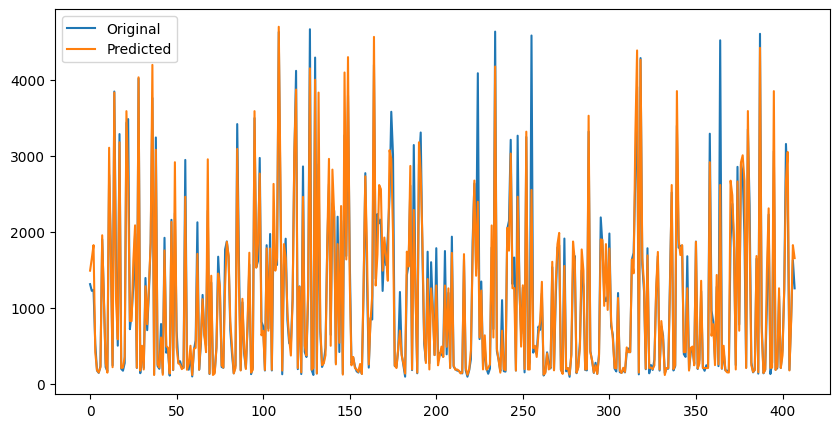

In [59]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label="Original")
plt.plot(y_pred,label="Predicted")
plt.legend(fontsize = 10)
plt.show()

In [60]:
sum_residual = 0
for i in range(len(y_test)):
  sum_residual = sum_residual + (y_test[i][0] - y_pred[i])**2


In [61]:
sum1 = 0
for i in range(len(y_test)):
  sum1 = sum1 + y_test[i][0]
mean = sum1/len(y_test)

In [62]:
mean

1125.2066677130904

In [63]:
sum_total = 0
for i in range(len(y_test)):
  sum_total = sum_total + (y_test[i][0] - mean)**2

In [64]:
r_squared = 1 - (sum_residual/sum_total)

In [65]:
r_squared

0.9377106120245248

In [66]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_test,y_pred)

In [67]:
R_squared

0.9377106120245247